## Johnatan Meoño Notebook para Deployment

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb 
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

C:\Users\Johnatan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
## esta llamanada sirve para la fucion que separara datos 
from sklearn.model_selection import train_test_split

In [4]:
from sklearn import tree
from sklearn import svm
from sklearn.metrics import brier_score_loss
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.externals import joblib ## libreria para poder escribrir, guardar o exportar los modelos al disco duro

In [5]:
from scipy import stats

In [6]:
import graphviz ## sirve para graficar el decision tree

### Cargando datos para prueba 

In [7]:
Data_X = pd.read_csv('X_pruebas_deployment.csv',header=None)

In [8]:
Data_X

,0,1,2,3,4
0,1.0,0.0,0.4800,1.0,1.0
1,1.0,0.0,0.2400,0.0,1.0
2,0.0,2.0,0.4050,0.0,0.0
3,0.0,0.0,0.1800,2.0,0.0
4,0.0,2.0,0.0400,1.0,0.0
5,0.0,0.0,0.2400,2.0,1.0
6,1.0,0.0,0.2500,0.0,0.0
7,0.0,0.0,0.1900,0.0,0.0
8,0.0,0.0,0.3600,2.0,1.0
9,0.0,0.0,0.1500,0.0,1.0


In [9]:
x_features = Data_X.values 

In [10]:
x_features 

array([[1.    , 0.    , 0.48  , 1.    , 1.    ],
       [1.    , 0.    , 0.24  , 0.    , 1.    ],
       [0.    , 2.    , 0.405 , 0.    , 0.    ],
       [0.    , 0.    , 0.18  , 2.    , 0.    ],
       [0.    , 2.    , 0.04  , 1.    , 0.    ],
       [0.    , 0.    , 0.24  , 2.    , 1.    ],
       [1.    , 0.    , 0.25  , 0.    , 0.    ],
       [0.    , 0.    , 0.19  , 0.    , 0.    ],
       [0.    , 0.    , 0.36  , 2.    , 1.    ],
       [0.    , 0.    , 0.15  , 0.    , 1.    ],
       [0.    , 0.    , 0.18  , 0.    , 1.    ],
       [0.    , 2.    , 0.09  , 0.    , 0.    ],
       [0.    , 0.    , 0.28  , 2.    , 1.    ],
       [0.    , 2.    , 0.18  , 2.    , 1.    ],
       [0.    , 0.    , 0.17  , 2.    , 1.    ],
       [1.    , 0.    , 0.29  , 2.    , 1.    ],
       [1.    , 0.    , 0.23  , 1.    , 1.    ],
       [0.    , 0.    , 0.28  , 2.    , 0.    ],
       [1.    , 2.    , 0.36  , 1.    , 1.    ],
       [0.    , 0.    , 0.18  , 2.    , 0.    ],
       [0.    , 2.  

In [11]:
Data_Y = pd.read_csv('Y_pruebas_deployment.csv',header=None)

In [12]:
Data_Y

,0
0,1.0
1,1.0
2,0.0
3,0.0
4,1.0
5,0.0
6,1.0
7,0.0
8,1.0
9,1.0


In [13]:
y_observada = Data_Y.values 

In [14]:
y_observada 

array([[1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],

# Cargando los modelos

In [15]:
decision_tree = joblib.load("Decisiontree_max_depth=4.pkl")

In [16]:
#dot_data = tree.export_graphviz(decision_tree,out_file=None)
#graph = graphviz.Source(dot_data)
#graph

In [17]:
svm = joblib.load("SVM_C=0.1.pkl")

In [18]:
reg_logistica = joblib.load("regLog_epochs=20_lr=1_Lasso=0.001_Ledge=0.pkl")

In [19]:
estimadores = [decision_tree,svm,reg_logistica] ## lista que guarda los modelos cargados 

In [33]:
def predict_voting(estimadores,features):
    
    predicciones = [] 
    
    ##desicion tree
    predicciones.append(estimadores[0].predict(features)) #0 es el modelo decision tree
    
    ##dibujando el arbol 
    dot_data = tree.export_graphviz(estimadores[0],out_file=None,filled=True, rounded=True,special_characters=True)
    graph1 = graphviz.Source(dot_data)
    
    ##svm
    predicciones.append(estimadores[1].predict(features)) #1 es el modelo svm
    
    ##reglogistica
    predicciones.append(((1/(1+np.exp((np.matmul(features,estimadores[2][0])+estimadores[2][1])*-1)))>=0.5)*1)
    probabilidad = 1/(1+np.exp((np.matmul(features,estimadores[2][0])+estimadores[2][1])*-1))
    
    ##bayes
    
    ##votacion
    prediccion = stats.mode(predicciones)[0]
    
    print("Predicciones", predicciones)
    print("Predicciòn", prediccion)
    print("Probabilidad regresion logistica", probabilidad)
    return graph1

# Predicción No. 1

Predicciones [array([1.]), array([1.]), array([[1]])]
Predicciòn [[1.0]]
Probabilidad regresion logistica [[0.64089457]]


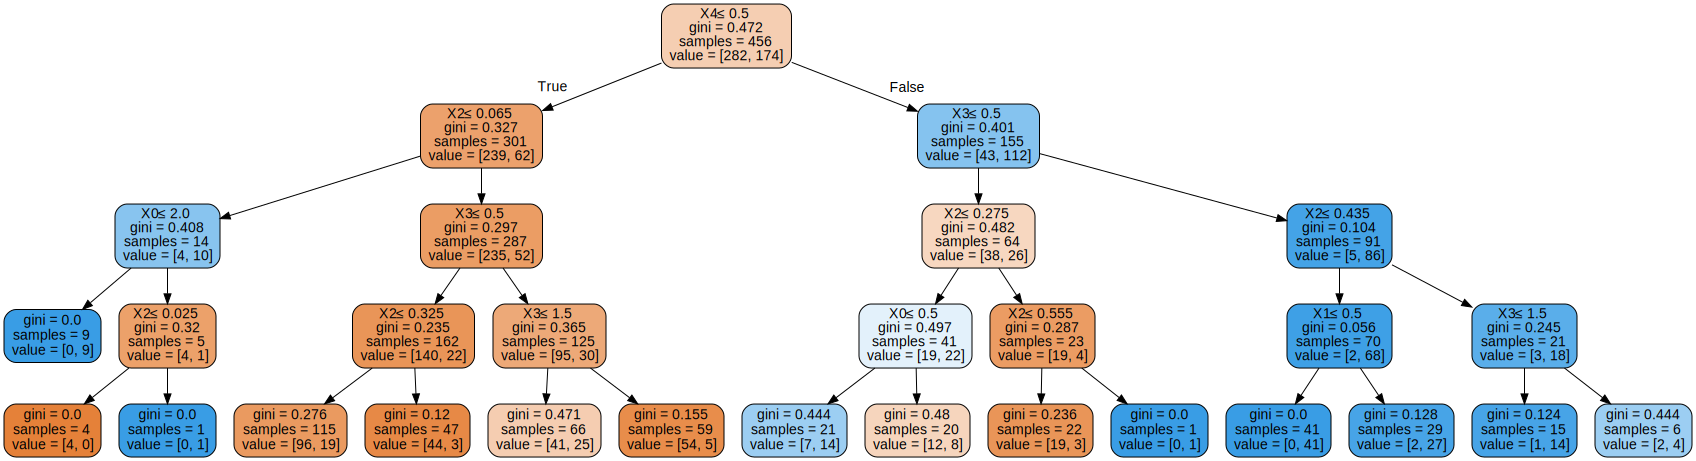

In [34]:
predict_voting(estimadores,x_features[0].reshape((1,5)))

# Predicción No. 2

Predicciones [array([0.]), array([1.]), array([[1]])]
Predicciòn [[1.0]]
Probabilidad regresion logistica [[0.61287899]]


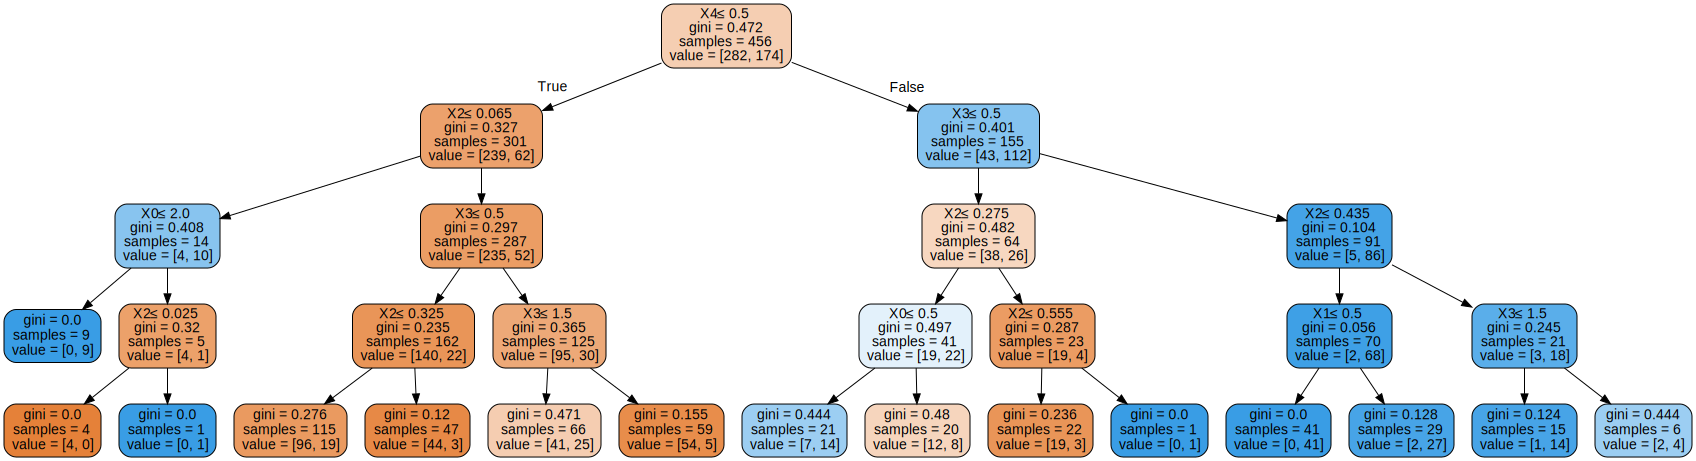

In [35]:
predict_voting(estimadores,x_features[1].reshape((1,5)))

# Predicción No. 3

Predicciones [array([0.]), array([0.]), array([[0]])]
Predicciòn [[0.0]]
Probabilidad regresion logistica [[0.11626945]]


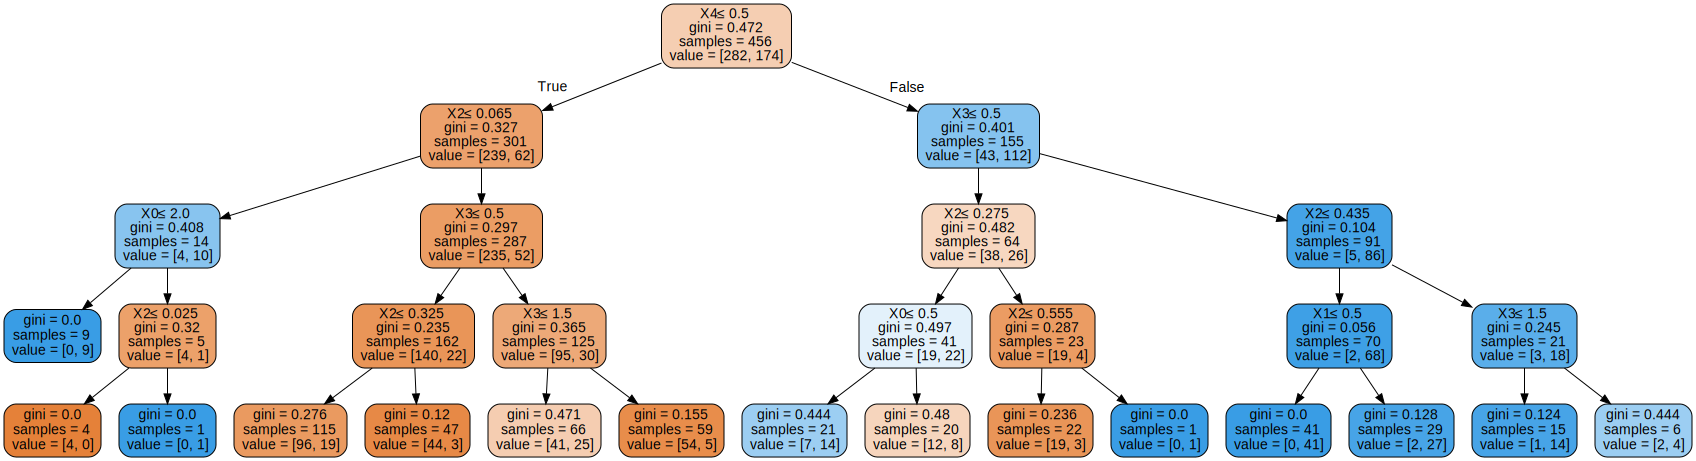

In [36]:
predict_voting(estimadores,x_features[2].reshape((1,5)))

# Predicción No. 4

Predicciones [array([0.]), array([0.]), array([[0]])]
Predicciòn [[0.0]]
Probabilidad regresion logistica [[0.43261406]]


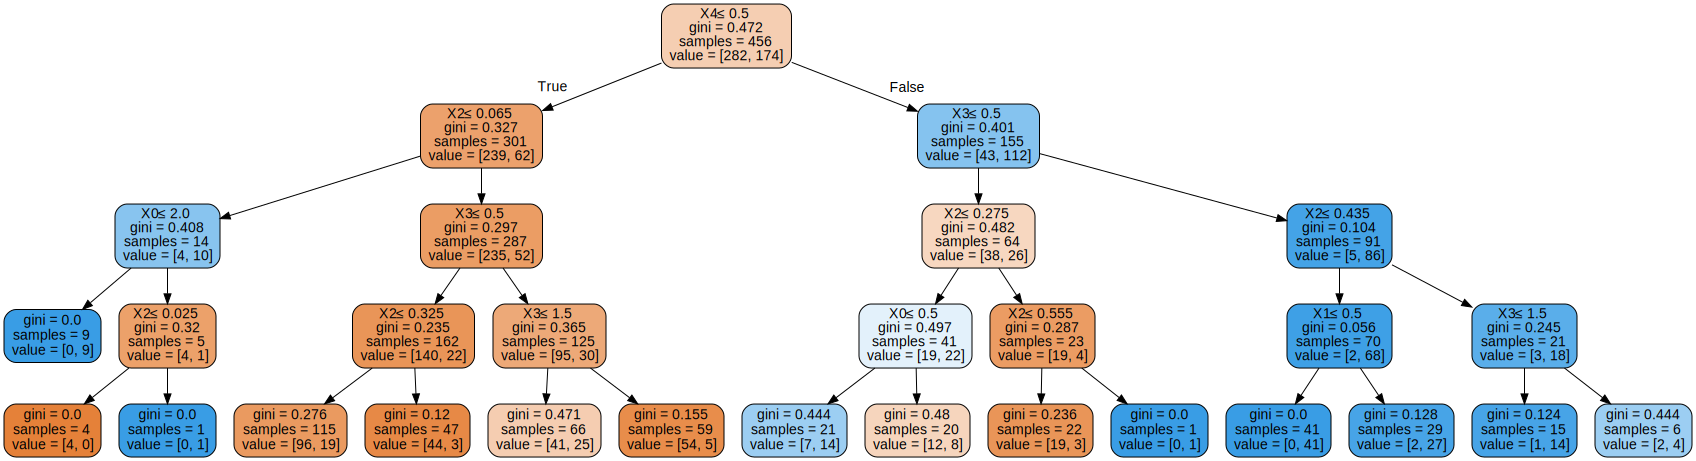

In [37]:
predict_voting(estimadores,x_features[3].reshape((1,5)))

# Predicción No. 5

Predicciones [array([1.]), array([0.]), array([[0]])]
Predicciòn [[0.0]]
Probabilidad regresion logistica [[0.27798373]]


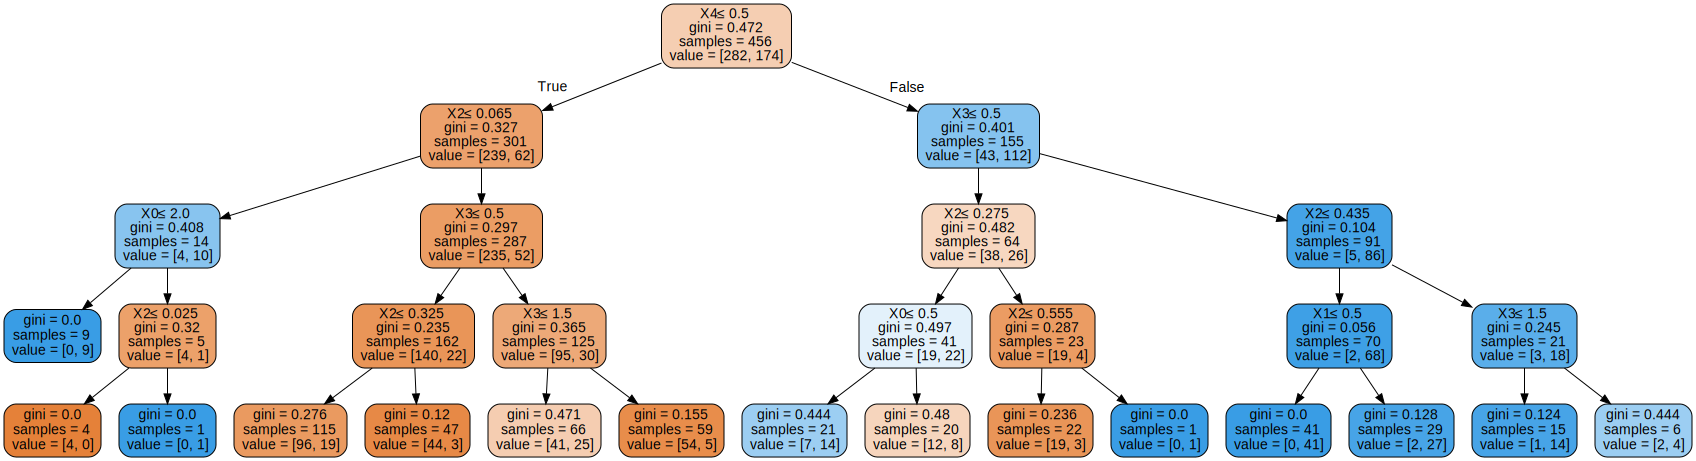

In [38]:
predict_voting(estimadores,x_features[4].reshape((1,5)))

# Predicción No. 6

Predicciones [array([0.]), array([0.]), array([[0]])]
Predicciòn [[0.0]]
Probabilidad regresion logistica [[0.133622]]


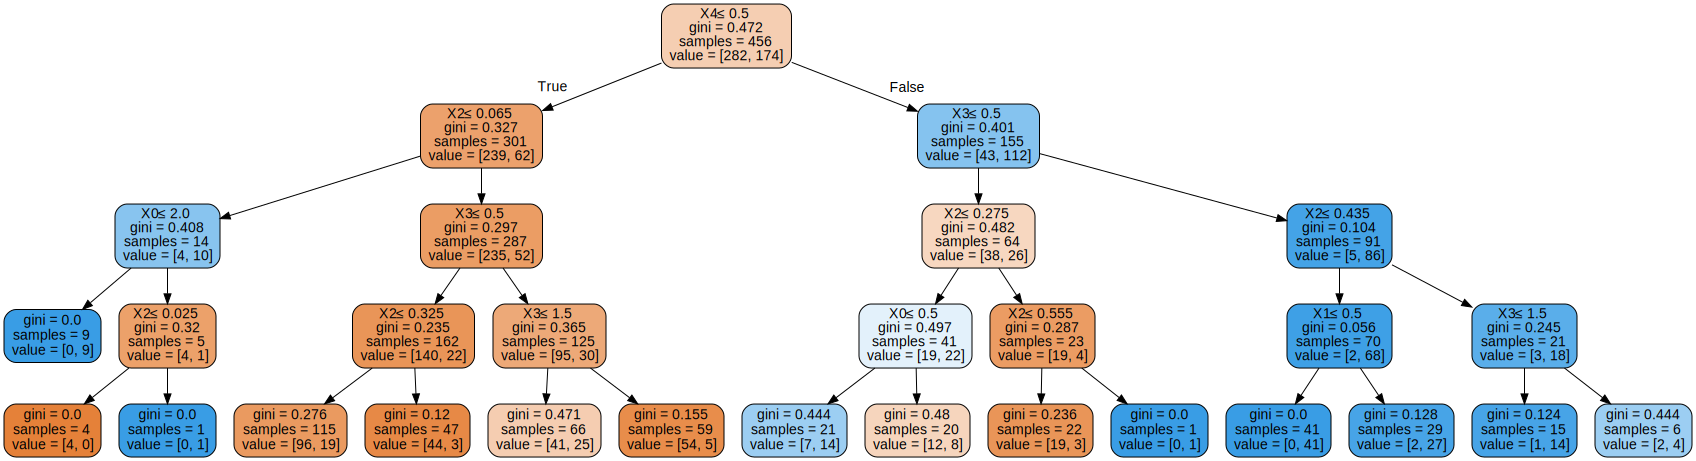

In [39]:
predict_voting(estimadores,x_features[138].reshape((1,5)))

# Predicción No. 7

Predicciones [array([1.]), array([0.]), array([[0]])]
Predicciòn [[0.0]]
Probabilidad regresion logistica [[0.40123252]]


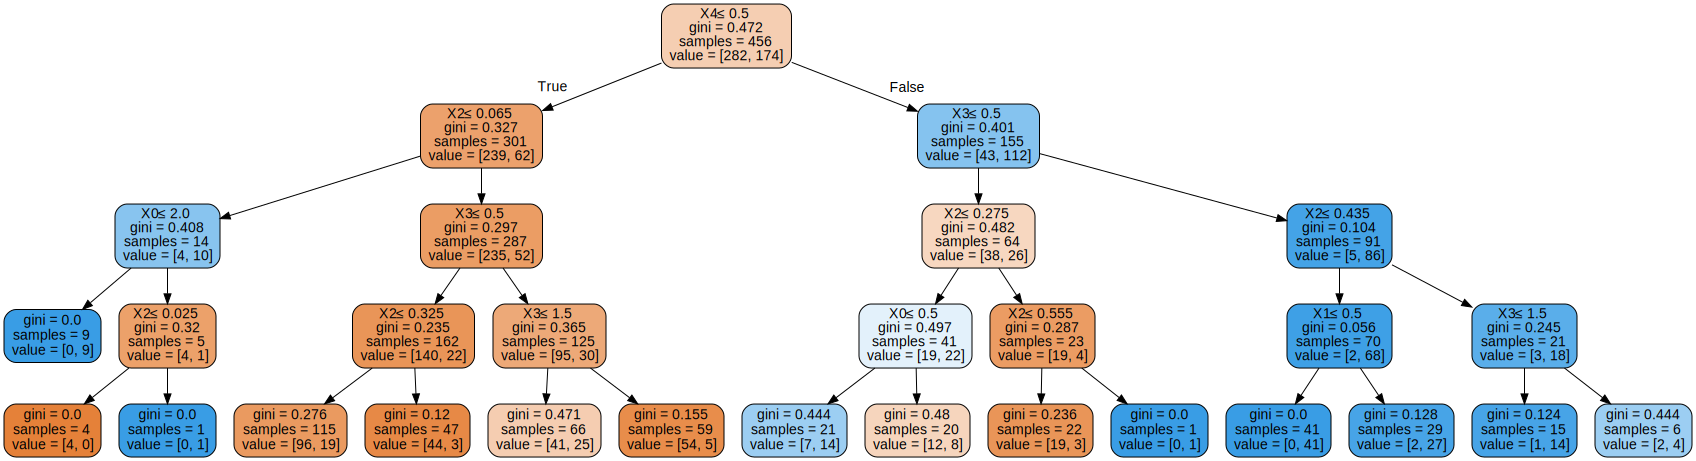

In [40]:
predict_voting(estimadores,x_features[139].reshape((1,5)))

# Predicción No. 8

Predicciones [array([0.]), array([0.]), array([[0]])]
Predicciòn [[0.0]]
Probabilidad regresion logistica [[0.16337515]]


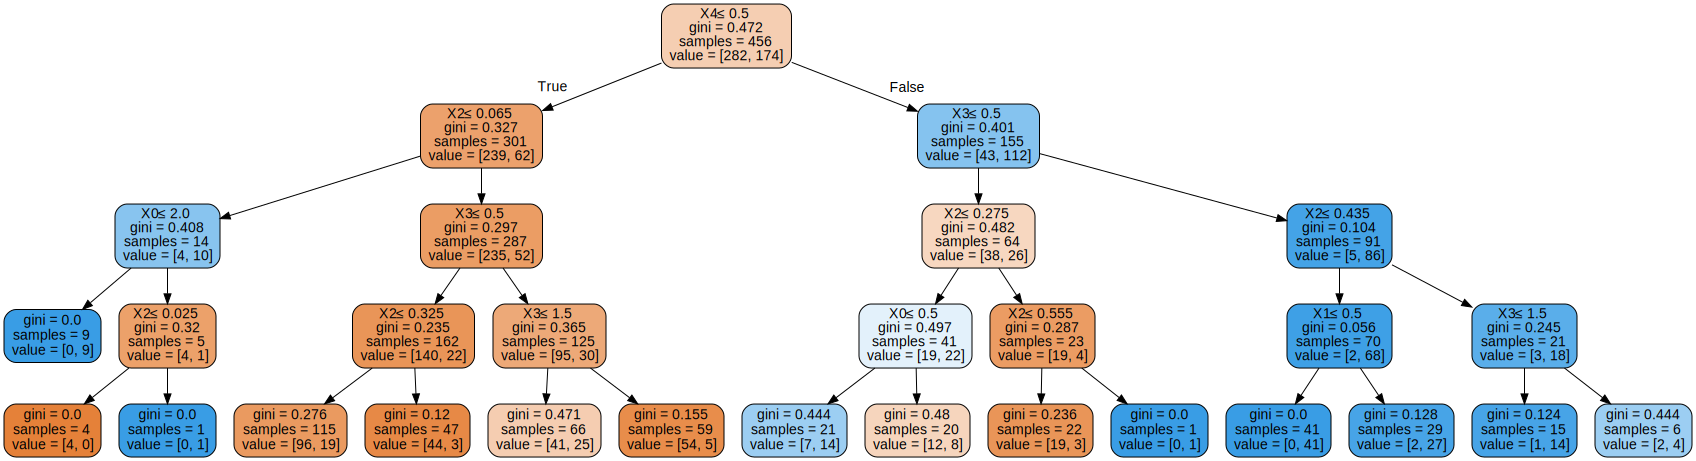

In [41]:
predict_voting(estimadores,x_features[140].reshape((1,5)))

# Predicción No. 9

Predicciones [array([1.]), array([1.]), array([[1]])]
Predicciòn [[1.0]]
Probabilidad regresion logistica [[0.7540674]]


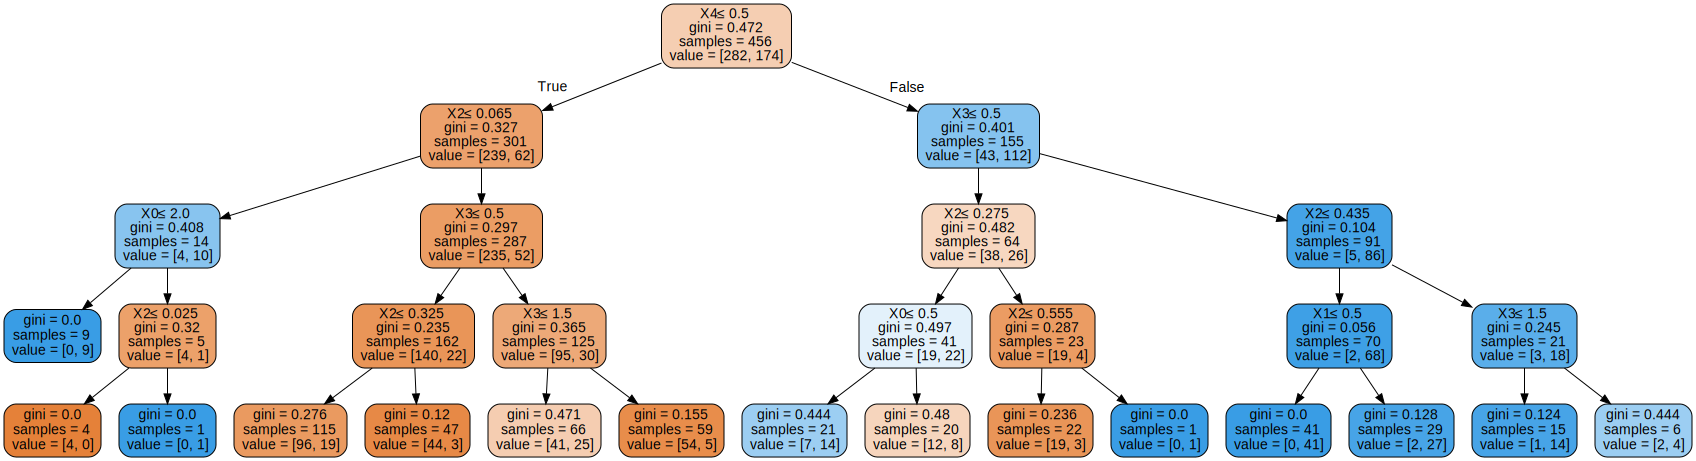

In [42]:
predict_voting(estimadores,x_features[141].reshape((1,5)))

# Predicción No. 10

Predicciones [array([1.]), array([1.]), array([[1]])]
Predicciòn [[1.0]]
Probabilidad regresion logistica [[0.71540213]]


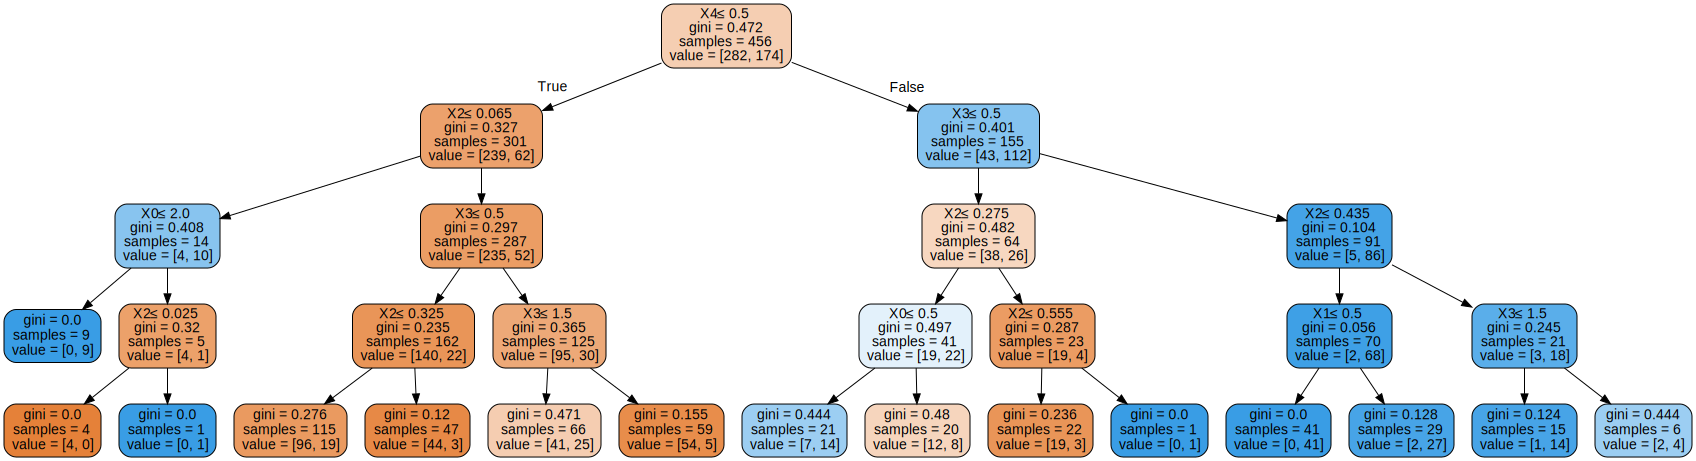

In [43]:
predict_voting(estimadores,x_features[142].reshape((1,5)))